In [105]:
'''
SGD Regressor

Dataset: https://www.kaggle.com/adithyabshetty100/student-performance
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

data = pd.read_csv("~/Desktop/Sklearn Data Sets/Student Performance/Student Performance.csv")
print(data.info())
print(data.head())

X = data['reading score']
y = data['writing score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      s

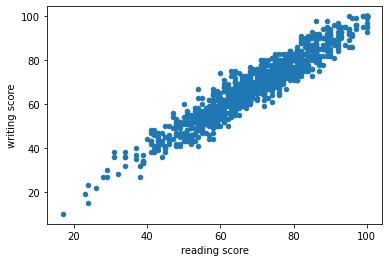

In [106]:
data.plot(kind="scatter", x="reading score", y="writing score")
plt.show()

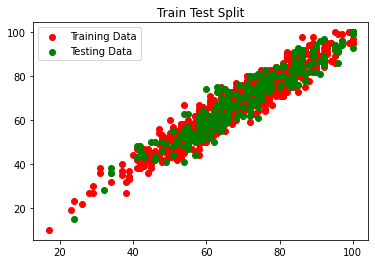

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X_train, y_train, label="Training Data", color='r')
plt.scatter(X_test, y_test, label="Testing Data", color='g')
plt.legend()
plt.title("Train Test Split")
plt.show()

In [108]:
#create linear model and then train it
SGDLR = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
SGDLR.fit(X_train.values.reshape(-1,1), y_train.values)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [109]:
prediction = SGDLR.predict(X_test.values.reshape(-1,1))

(250,)
(250,)
(250,)


<function matplotlib.pyplot.show(*args, **kw)>

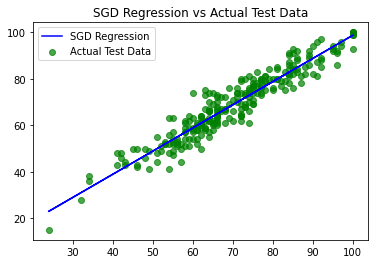

In [110]:
print(X_test.shape)
print(y_test.shape)
print(prediction.shape)
plt.plot(X_test, prediction, label="SGD Regression", color='b')
plt.scatter(X_test, y_test, label="Actual Test Data", color='g', alpha=.7)
plt.title("SGD Regression vs Actual Test Data")
plt.legend()
plt.show

In [111]:
SGDLR.score(X_test.values.reshape(-1,1), y_test.values)

0.8983613173955172

In [112]:
SGDLR.predict(np.array(([[50]])))[0]

48.8621939667946